In [98]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir(r'C:\Users\User\Desktop\j\lessons\lesson_4\data')

['2020-12-03',
 '2020-12-04',
 '2020-12-05',
 '2020-12-06',
 '2020-12-07',
 '2020-12-08',
 '2020-12-09']

In [3]:
path = r'C:\Users\User\Desktop\j\lessons\lesson_4\data'

In [4]:
list(os.walk(path))

[('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data',
  ['2020-12-03',
   '2020-12-04',
   '2020-12-05',
   '2020-12-06',
   '2020-12-07',
   '2020-12-08',
   '2020-12-09'],
  []),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03',
  ['Alexey_Smirnov',
   'Anton_Petrov',
   'Kirill_Petrov',
   'Petr_Fedorov',
   'Vasiliy_Ivanov',
   'Vasiliy_Petrov'],
  []),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Alexey_Smirnov',
  [],
  ['data.csv']),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Anton_Petrov',
  [],
  ['data.csv']),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Kirill_Petrov',
  [],
  ['data.csv']),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Petr_Fedorov',
  [],
  ['data.csv']),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Vasiliy_Ivanov',
  [],
  ['data.csv']),
 ('C:\\Users\\User\\Desktop\\j\\lessons\\lesson_4\\data\\2020-12-03\\Vasiliy

In [76]:
df = pd.DataFrame()
for current_path, dirs, files in os.walk(path):
    for file in files:
        data_path = f'{current_path}\{file}'
        temp_df = pd.read_csv(data_path)
        path_parts = current_path.split('\\')
        name = path_parts[-1] 
        date = path_parts[-2]
        temp_df['name'] = name
        temp_df['date']= date
        df = pd.concat((df, temp_df))
df

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...,...
1,1,66,4,Rostislav_Petrov,2020-12-09
2,2,39,2,Rostislav_Petrov,2020-12-09
0,0,82,4,Vasiliy_Ivanov,2020-12-09
1,1,74,2,Vasiliy_Ivanov,2020-12-09


In [77]:
df.drop(columns='Unnamed: 0', inplace=True)
# df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
156,66,4,Rostislav_Petrov,2020-12-09
157,39,2,Rostislav_Petrov,2020-12-09
158,82,4,Vasiliy_Ivanov,2020-12-09
159,74,2,Vasiliy_Ivanov,2020-12-09


In [78]:
df.agg({'quantity':'sum'})

quantity    480
dtype: int64

In [84]:
df.groupby('name', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [90]:
df_products = df.groupby('product_id', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

In [92]:
df_products = df_products.head(10)
df_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

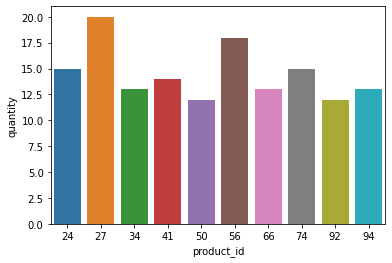

In [95]:
sns.barplot(x = df_products['product_id'], y = df_products['quantity'])

<AxesSubplot:xlabel='date', ylabel='quantity'>

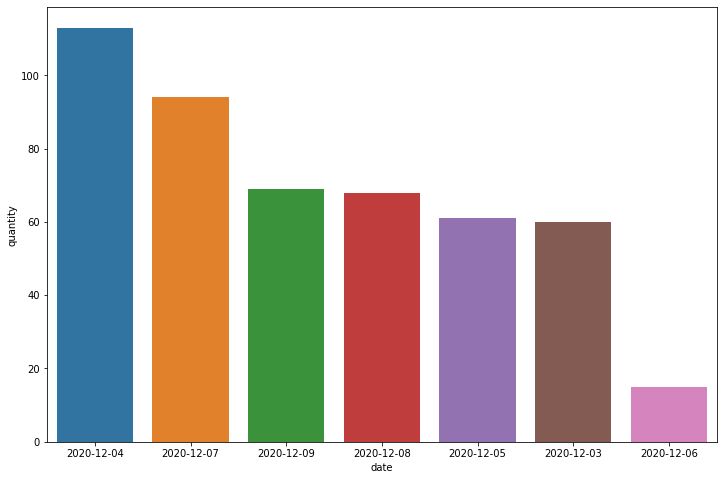

In [99]:
plt.figure(figsize=(12, 8))
df_dates = df.groupby('date', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)
sns.barplot(x = df_dates['date'], y = df_dates['quantity'])

In [101]:
df.groupby(['name', 'product_id'], as_index = False).agg({'date':pd.Series.nunique}).query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
